In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18, 10)

import sys; sys.path.append('..'); import database

database.DB_HOST = 'localhost'
db = database.connect()

In [7]:
with db, db.cursor() as cursor:
    cursor.execute('select * from user_follows')
    follows = cursor.fetchall()
    cursor.execute('select id as user_id, follower_id, added_time from twitter_followers, users'
                   ' where twitter_followers.leader_id = users.twitter_id')
    followers = cursor.fetchall()

In [9]:
# We only began storing user's followers at this time:
min_time = min(row.added_time for row in followers if row.user_id == 2)
follows = [row for row in follows if row.time >= min_time]
print(min_time)

2017-02-09 00:56:03.756164+00:00


In [10]:
follow_times = {(row.user_id, row.leader_id): row.time for row in follows}
follower_times = {(row.user_id, row.follower_id): row.added_time for row in followers}
follow_delays = {k: follower_times[k] - follow_times[k] for k in follower_times if k in follow_times}

In [11]:
import collections
print('follows', collections.Counter(user_id for user_id, _ in follow_times))
print('followers', collections.Counter(user_id for user_id, _ in follower_times))
print('both', collections.Counter(user_id for user_id, _ in follow_delays))

follows Counter({2: 7737, 4: 7701, 5: 7019, 3: 3616, 1: 3157})
followers Counter({2: 11926, 4: 1371, 5: 841, 3: 284, 1: 202})
both Counter({2: 720, 4: 479, 5: 243, 3: 90, 1: 53})


(array([ 139.,  190.,  260.,  154.,   86.,   89.,   76.,   40.,   27.,
          50.,   31.,   16.,   20.,   23.,   13.,   20.,    6.,   15.,
           9.,   18.,   11.,    6.,    8.,    9.,   11.,    5.,    5.,
           5.,   11.,    2.,    7.,    6.,    4.,    6.,    2.,    4.,
           4.,    1.,    2.,    3.,    0.,    0.,    0.,    1.,    2.,
           0.,    2.,    0.,    0.,    1.]),
 array([ 0.06872617,  0.1659575 ,  0.26318882,  0.36042014,  0.45765147,
         0.55488279,  0.65211411,  0.74934543,  0.84657676,  0.94380808,
         1.0410394 ,  1.13827072,  1.23550205,  1.33273337,  1.42996469,
         1.52719601,  1.62442734,  1.72165866,  1.81888998,  1.9161213 ,
         2.01335263,  2.11058395,  2.20781527,  2.30504659,  2.40227792,
         2.49950924,  2.59674056,  2.69397188,  2.79120321,  2.88843453,
         2.98566585,  3.08289717,  3.1801285 ,  3.27735982,  3.37459114,
         3.47182246,  3.56905379,  3.66628511,  3.76351643,  3.86074776,
         3.95797

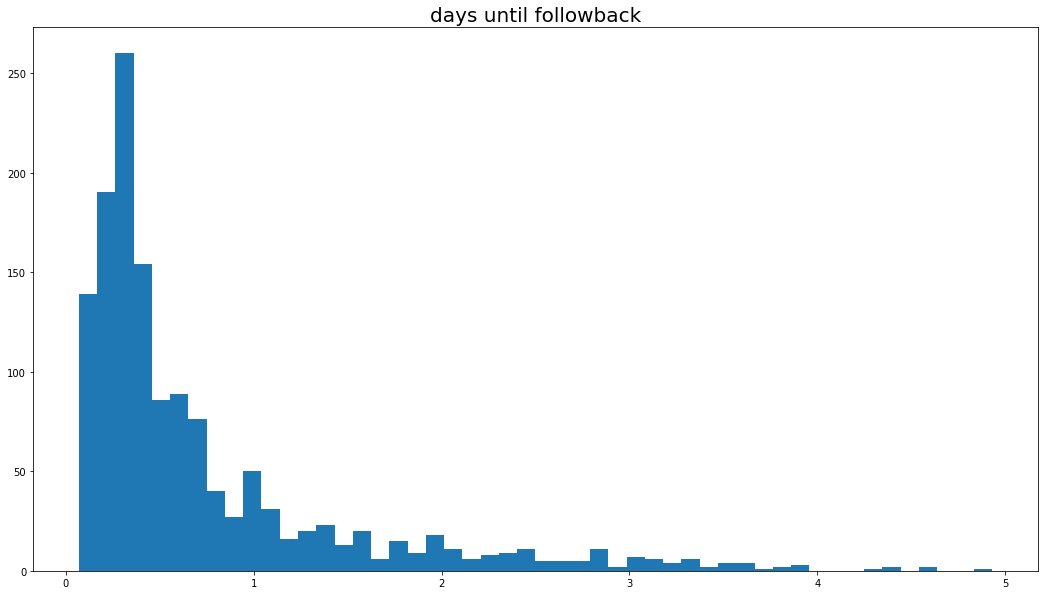

In [14]:
import datetime
plt.title('days until followback', fontsize=20)
plt.hist([d / datetime.timedelta(days=1) for d in follow_delays.values() if d.total_seconds() > 0 and d.days < 5], 50)

(array([  73.,  165.,   40.,   64.,   92.,   43.,  109.,  111.,   57.,
          30.,   70.,   56.,   66.,   42.,   13.,   45.,   49.,   55.,
          91.,   61.,   90.,   26.,   84.,   53.]),
 array([  0.        ,   0.95833333,   1.91666667,   2.875     ,
          3.83333333,   4.79166667,   5.75      ,   6.70833333,
          7.66666667,   8.625     ,   9.58333333,  10.54166667,
         11.5       ,  12.45833333,  13.41666667,  14.375     ,
         15.33333333,  16.29166667,  17.25      ,  18.20833333,
         19.16666667,  20.125     ,  21.08333333,  22.04166667,  23.        ]),
 <a list of 24 Patch objects>)

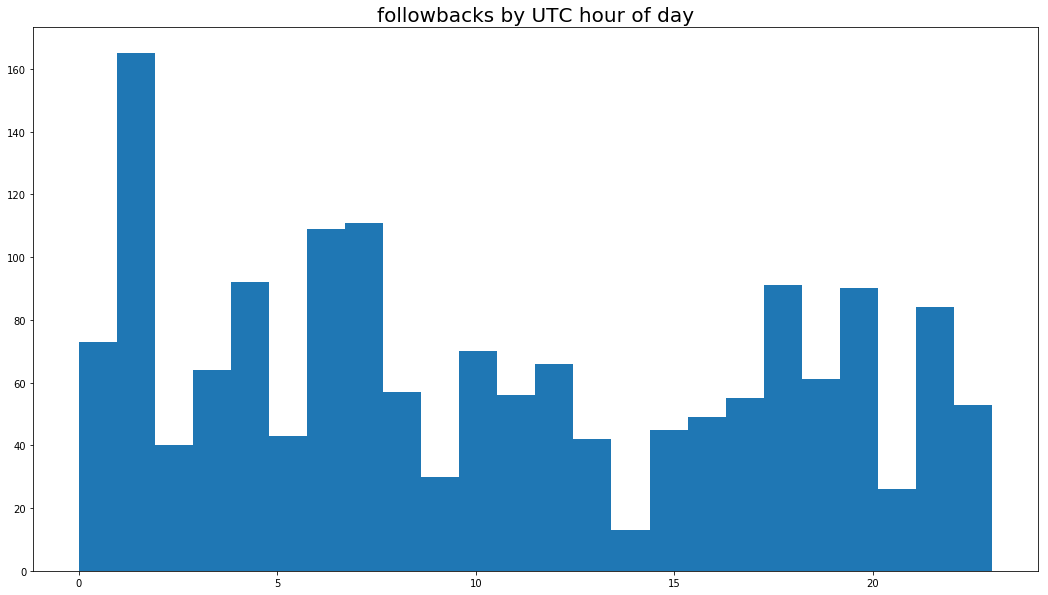

In [15]:
plt.title('followbacks by UTC hour of day', fontsize=20)
plt.hist([t.hour for k, t in follow_times.items() if k in follower_times], 24)

(array([ 206.,  221.,  186.,  260.,  225.,  281.,  206.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ]),
 <a list of 7 Patch objects>)

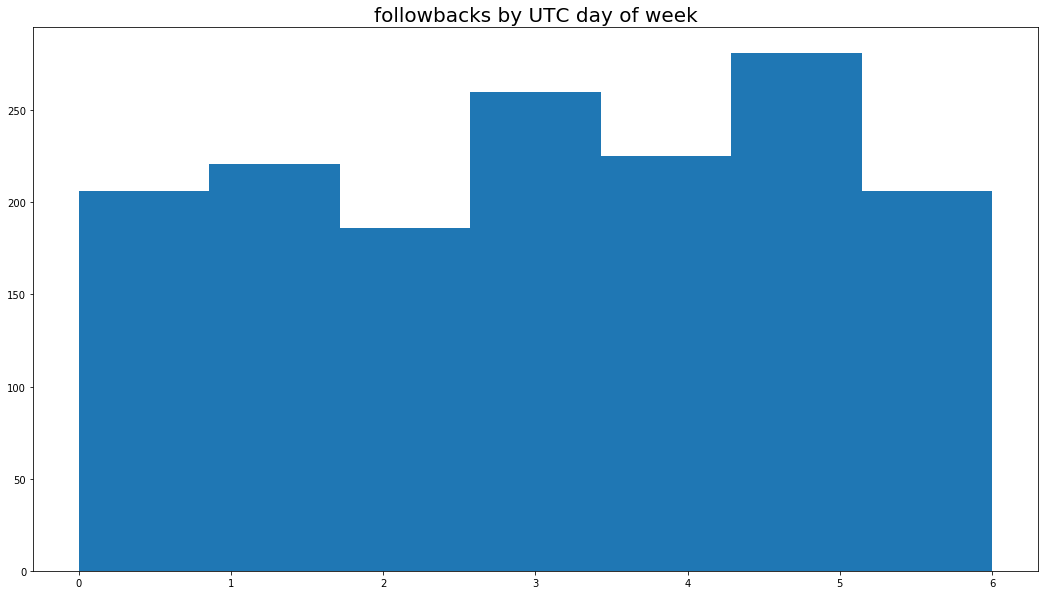

In [17]:
plt.title('followbacks by UTC day of week', fontsize=20)
plt.hist([t.weekday() for k, t in follow_times.items() if k in follower_times], 7)

(array([ 20.,   9.,  11.,  18.,   5.,   0.,  41.,   3.,   0.,   0.,   8.,
          6.,   2.,   0.,   1.,   1.,   0.,  10.,   6.,   1.,  44.,   1.,
          0.,  19.,  16.,  37.,   0.,   6.,  12.,   0.,  15.,  15.,  12.,
          2.,  16.,   0.,   3.,   8.,   0.,  12.,   0.,   6.,   0.,  11.,
          9.,   6.,  17.,  18.,  18.,  21.,  16.,  17.,   0.,   4.,   0.,
         24.,  26.,  14.,   0.,  10.,   7.,   0.,   3.,   0.,  11.,   1.,
          4.,   0.,   1.,   1.,   6.,   2.,   5.,  40.,   0.,  13.,  20.,
          0.,  13.,  14.,   0.,   0.,  43.,  13.,   0.,   0.,   0.,  19.,
          7.,   6.,  39.,   3.,   0.,   0.,  23.,   2.,   2.,  16.,   4.,
          9.,  17.,   0.,  11.,  23.,   6.,   0.,   1.,  15.,  13.,  19.,
          0.,   4.,   5.,   2.,  35.,   5.,  26.,  12.,   0.,   0.,   0.,
         22.,   9.,   1.,  29.,   5.,  11.,  23.,   0.,   8.,   0.,  12.,
         30.,  12.,   6.,   3.,  13.,  24.,   5.,  16.,  10.,   3.,  37.,
          2.,  12.,  20.,   0.,   0., 

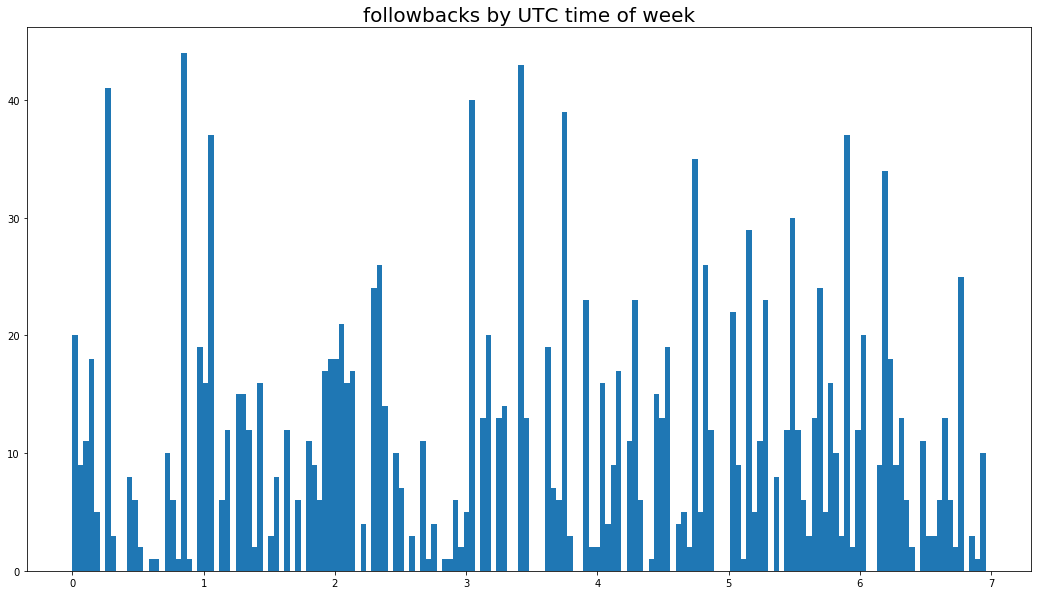

In [18]:
plt.title('followbacks by UTC time of week', fontsize=20)
plt.hist([t.weekday() + t.hour / 24 for k, t in follow_times.items() if k in follower_times], 7 * 24)